In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt

In [2]:
df = pd.read_pickle("../../../actionspace_final/action_space.pkl")
df["model"] = df["model"].apply(lambda x: x.split("/")[-1])
df["opponent"] = df["opponent"].apply(lambda x: x.split("/")[-1])
df["model"].replace("best_old", "ppo", inplace=True)
df["model"].replace("td3_corne", "td3", inplace=True)

In [3]:
df["model"] = df["model"].apply(lambda x: x.upper())

def add_r(x):
    # get index of all number
    idx = [i for i, ltr in enumerate(x) if ltr.isdigit()]
    # if R in front of number do nothing
    if x[idx[-1] - 1] == "R":
        return x
    # esle add R in front of number
    else:
        return x[:idx[-1]] + "R" + x[idx[-1]:]
        
    
    

df["model"] = df["model"].apply(lambda x: add_r(x))
#df

In [4]:
df.sort_values(by=["model"])

,action_space,observation_space,reward_space,model,opponent
8,"[[0.46195265650749207, -0.14779751002788544, 0...","[[-2.9828364849090576, -0.0023648738861083984,...","[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....",GSDE_PPO_R0,strong
7,"[[-0.1334519386291504, -0.291684091091156, 0.4...","[[-3.0049943923950195, -0.008409738540649414, ...","[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....",GSDE_PPO_R1,strong
13,"[[-0.3890078067779541, -0.09619807451963425, -...","[[-3.0144872665405273, -0.003616809844970703, ...","[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....",GSDE_PPO_R2,strong
0,"[[0.7741513252258301, -0.18507781624794006, 0....","[[-2.971194267272949, -0.0044403076171875, 0.0...","[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....",GSDE_PPO_R2_ONLYSELFPLAY,strong
10,"[[1.0, 1.0, 1.0, 0.14031901955604553], [1.0, 0...","[[-2.9628634452819824, 0.042307376861572266, 0...","[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....",PPO_R0_NO_SELFPLAY,strong
15,"[[1.0, 1.0, 0.9367190599441528, 0.124916285276...","[[-2.96285080909729, 0.041986942291259766, 0.0...","[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....",PPO_R0_SELFPLAY,strong
1,"[[0.427992582321167, 0.5357388257980347, -0.82...","[[-2.984132766723633, 0.0157623291015625, -0.0...","[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....",PPO_R1_NO_SELFPLAY,strong
16,"[[0.14670948684215546, 0.007959616370499134, -...","[[-2.9945380687713623, -0.0003733634948730469,...","[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....",PPO_R1_SELFPLAY,strong
4,"[[-0.08885730057954788, 0.0619046688079834, -0...","[[-3.003309726715088, 0.00189971923828125, -0....","[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....",PPO_R2_NO_SELFPLAY,strong
6,"[[-1.0, -0.7984675168991089, -0.41318309307098...","[[-3.037259101867676, -0.0318295955657959, -0....","[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....",PPO_R2_ONLYSELFPLAY,strong


In [26]:
models_to_include = ["TD3_R0_WITH_SELFPLAY", "TD3_R0_NO_SELFPLAY", "PPO_R0_NO_SELFPLAY", "GSDE_PPO_R0"]

models_to_include = ["TD3_R0_WITH_SELFPLAY", "TD3_R0_NO_SELFPLAY", "TD3_R2_NO_SELFPLAY"]

#models_to_include = ["PPO_R0_NO_SELFPLAY", "GSDE_PPO_R0"]


for opp in df["opponent"].unique():

    df_mean = df[["action_space", "model", "opponent"]].copy()
    df_mean = df_mean[df_mean["model"].isin(models_to_include)]
    df_mean = df_mean[df_mean["opponent"] == opp]
    #df_mean.rename(columns={"model": "Model"}, inplace=True)

    def convert_helper(action_space):
        action_space = [list(a) for a in action_space]
        action_space = np.array(action_space)
        action_mean = list(action_space.mean(axis=0))
        return action_mean

    df_mean["action_space"] = df_mean["action_space"].apply(convert_helper)
    # make every entry of action space an own column
    #df_mean = pd.DataFrame(df_mean["action_space"].to_list(), index=df_mean.index)
    name1 = "ppo"
    name2 = "td3"
    #df_mean["Model"] = [name1, name2]
    df_mean = df_mean.explode("action_space")
    unique_models = len(df_mean["model"].unique())
    df_mean["theta"] = ["a1", "a2", "a3", "a4"]*int(unique_models)
    # plot more df in one plot
    fig = px.line_polar(df_mean, r='action_space', theta='theta', color="model", line_close=True, range_r=[-0.3,0.5])
    # change figsize
    fig.update_layout(
        autosize=False,
        width=800,
        height=600,
    )
    # make legend bigger
    fig.update_layout(legend=dict(
        yanchor="top",
        y=0.99,
        xanchor="left",
        x=0.01,
    ))
    fig.update_layout(legend = dict(font = dict(family = "Courier", size = 16)))
    
    fig.show()
    # save fig
    #fig.savefig(f"Action_space_ppo.png", dpi=300)
    fig.write_image(f"Action_space_td3.png", format="png")


In [116]:
for opp in df["opponent"].unique():

    df_mean = df[["observation_space", "model", "opponent"]].copy()
    df_mean = df_mean[df_mean["opponent"] == opp]

    def convert_helper(action_space):
        action_space = [list(a) for a in action_space]
        action_space = np.array(action_space)
        action_mean = list(action_space.mean(axis=0))
        return action_mean

    df_mean["observation_space"] = df_mean["observation_space"].apply(convert_helper)
    # make every entry of action space an own column
    #df_mean = pd.DataFrame(df_mean["action_space"].to_list(), index=df_mean.index)

    df_mean = df_mean.explode("observation_space")
    unique_models = len(df_mean["model"].unique())
    df_mean["theta"] = [f"o{i}" for i in range(18)]*int(unique_models)
    # plot more df in one plot
    fig = px.line_polar(df_mean, r='observation_space', theta='theta', color="model", line_close=True, title=f"Observation Space when opponent is {opp}")

    fig.show()




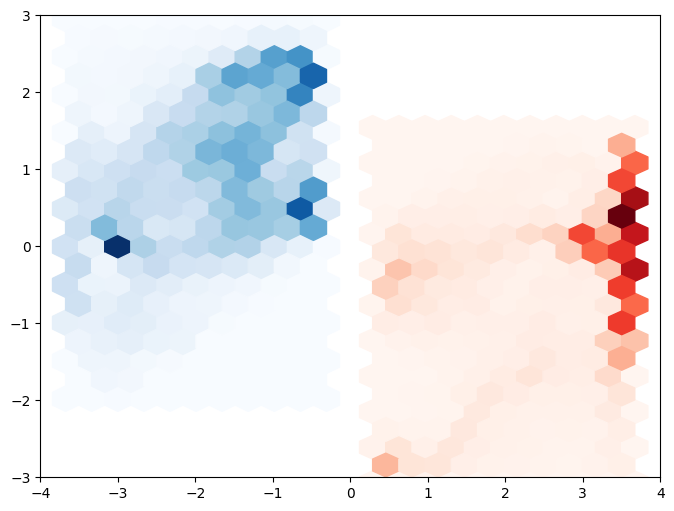

In [96]:
model1 = "PPO_R0_ONLY_SELFPLAY"
model2 = "GSDE_PPO_R2_ONLY_SELFPLAY"

model1 = "TD3_R0_NO_SELFPLAY"
model2 = "TD3_R1_WITH_SELFPLAY"

tmp = df[df["model"] == model1]
obs = tmp["observation_space"].values[0]
obs = np.array(obs)

tmp = df[df["model"] == model2]
obs2 = tmp["observation_space"].values[0]
obs2 = np.array(obs2)

pos = obs[:, :2]
pos2 = obs2[:, :2]

pos2[:,0] = pos2[:,0]*-1



# make hexbin heatmap
model1n = model1.replace("_", " ")
model2n = model2.replace("_", " ")
#plt.title(f"Location of {model1n} (left) and {model2n} (right)", fontsize=14)
plt.hexbin(pos[:, 0], pos[:, 1], gridsize=(10,10), cmap="Blues", label=model1)
plt.hexbin(pos2[:, 0], pos2[:, 1], gridsize=(10,10), cmap="Reds", label=model2)
# set legend color to blue and red respectively
#ax = plt.gca()
#plt.legend()
# legend handles to change color of legend picture
#legend = ax.get_legend()
#legend.legendHandles[0].set_color("blue")


# set x and y limit
plt.xlim(-4, 4)
plt.ylim(-3, 3)
# set figsize
plt.gcf().set_size_inches(8, 6)
plt.savefig("location_td3.png", dpi=300)
plt.show()


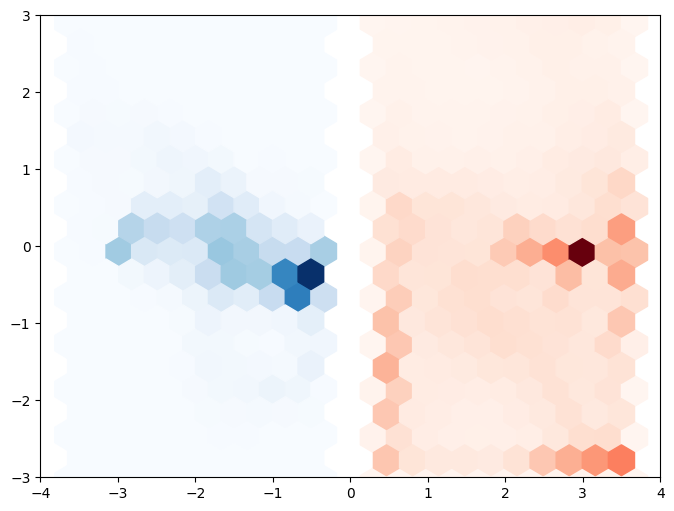

In [97]:
model1 = "PPO_R0_NO_SELFPLAY"
model2 = "GSDE_PPO_R2_ONLYSELFPLAY"

tmp = df[df["model"] == model1]
obs = tmp["observation_space"].values[0]
obs = np.array(obs)

tmp = df[df["model"] == model2]
obs2 = tmp["observation_space"].values[0]
obs2 = np.array(obs2)

pos = obs[:, :2]
pos2 = obs2[:, :2]

pos2[:,0] = pos2[:,0]*-1



# make hexbin heatmap
model1n = model1.replace("_", " ")
model2n = model2.replace("_", " ")
#plt.title(f"Location of {model1n} (left) and {model2n} (right)", fontsize=14)
plt.hexbin(pos[:, 0], pos[:, 1], gridsize=(10,10), cmap="Blues", label=model1)
plt.hexbin(pos2[:, 0], pos2[:, 1], gridsize=(10,10), cmap="Reds", label=model2)
# set legend color to blue and red respectively
#ax = plt.gca()
#plt.legend()
# legend handles to change color of legend picture
#legend = ax.get_legend()
#legend.legendHandles[0].set_color("blue")


# set x and y limit
plt.xlim(-4, 4)
plt.ylim(-3, 3)
# set figsize
plt.gcf().set_size_inches(8, 6)
plt.savefig("location_ppo.png", dpi=300)
plt.show()
#plt.savefig("location_ppo.png", dpi=300)
#fig.write_image(f"location_ppo.png", format="png")

In [90]:
df

,action_space,observation_space,reward_space,model,opponent
0,"[[0.7741513252258301, -0.18507781624794006, 0....","[[-2.971194267272949, -0.0044403076171875, 0.0...","[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....",GSDE_PPO_R2_ONLYSELFPLAY,strong
1,"[[0.427992582321167, 0.5357388257980347, -0.82...","[[-2.984132766723633, 0.0157623291015625, -0.0...","[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....",PPO_R1_NO_SELFPLAY,strong
2,"[[0.9988815784454346, 0.520369291305542, -0.86...","[[-2.962878465652466, 0.015004158020019531, -0...","[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....",TD3_R2_NO_SELFPLAY,strong
3,"[[-0.9999098777770996, -0.9999991059303284, 0....","[[-3.0373430252075195, -0.03217577934265137, 0...","[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....",TD3_R1_NO_SELFPLAY,strong
4,"[[-0.08885730057954788, 0.0619046688079834, -0...","[[-3.003309726715088, 0.00189971923828125, -0....","[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....",PPO_R2_NO_SELFPLAY,strong
5,"[[-0.061942048370838165, 0.017010178416967392,...","[[-3.002321243286133, -0.0012392997741699219, ...","[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....",PPO_R2_SELFPLAY,strong
6,"[[-1.0, -0.7984675168991089, -0.41318309307098...","[[-3.037259101867676, -0.0318295955657959, -0....","[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....",PPO_R2_ONLYSELFPLAY,strong
7,"[[-0.1334519386291504, -0.291684091091156, 0.4...","[[-3.0049943923950195, -0.008409738540649414, ...","[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....",GSDE_PPO_R1,strong
8,"[[0.46195265650749207, -0.14779751002788544, 0...","[[-2.9828364849090576, -0.0023648738861083984,...","[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....",GSDE_PPO_R0,strong
9,"[[-0.013781607151031494, -0.7659105062484741, ...","[[-3.000610828399658, -0.03340864181518555, -0...","[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....",TD3_R0_WITH_SELFPLAY,strong
